$$
\begin{aligned}
\underset{\Large{\text{L.Lessard, Spring 2017}}}{\large{\text{Introduction to Optimization CS 524}}} \\
\end{aligned}
$$

$$
\begin{aligned}
\underset{\Large{\text{Due date: 11:00pm on Monday May 8, 2017}}}{\Large{\text{Determining Winning Strategies Using Game Theoretic Optimization}}} \\
\end{aligned}
$$

$$
\begin{aligned}
\underset{\large{\text{tuandinh@cs.wisc.edu}}}{\large{\text{Tuan Dinh}}} && \underset{\large{\text{varun@cs.wisc.edu}}}{\large{\text{Varun Sah}}} \\
\end{aligned}
$$

*****

<center> <h3>CS/ECE/ISyE 524 &mdash; Introduction to Optimization &mdash; Spring 2017 </h3> </center>

<center> <h1>Determining Winning Strategies Using Game Theoretic Optimization</h1> </center>

<center> <h4>Tuan Dinh (tuandinh@cs.wisc.edu) &mdash; Varun Sah (varun@cs.wisc.edu)</h4> </center>

*****

### Table of Contents

1. [Introduction](#1.-Introduction)
  1. [History and Significance](#1.A.-History-and-Significance)
  1. [Terminology](#1.B.-Terminology)
  1. [Outline](#1.C.-Outline)
1. [The Chess Ecosystem](#2.-The-Chess-Ecosystem)
  1. [Rules](#2.A.-Rules)
  1. [Ranking and Scoring](#2.B.-Ranking-and-Scoring)
  1. [Data and Helper Methods](#2.C.-Data-and-Helper-Methods)
1. [Naive Model](#3.-Naive-Model)
  1. [Mathematical Model](#3.A.-Mathematical-model)
  1. [Solution](#3.B.-Solution)
  1. [Results and Discussion](#3.C.-Results-and-Discussion)
1. [Maximin Model](#4.-Maximin-Model)
  1. [Mathematical Model](#4.A.-Mathematical-model)
  1. [Solution](#4.B.-Solution)
  1. [Results and Discussion](#4.C.-Results-and-Discussion)
1. [Nash Equilibrium Model](#5.-Nash-Equilibrium-Model)
  1. [Mathematical Model](#5.A.-Mathematical-model)
  1. [Solution](#5.B.-Solution)
  1. [Results and Discussion](#5.C.-Results-and-Discussion)
1. [Budget Trade-off Model](#6.-Budget-Trade-off-Model)
  1. [Mathematical Model](#6.A.-Mathematical-model)
  1. [Solution](#6.B.-Solution)
  1. [Results and Discussion](#6.C.-Results-and-Discussion) 
1. [Results Summary and Discussion](#7.-Results-Summary-and-Discussion)
1. [Conclusion](#8.-Conclusion)
1. [Appendix](#9.-Appendix)

## <center>1. Introduction</center> ##
<p style = "text-align: justify">
In team sports, strategy plays a vital role in determining which team emerges victorious since team clashes cannot always be won by relying on individual prowess alone. The importance of strategy gains even more significance when the sport involves a series of head-to-head individual games between team members like in the [Davis Cup](https://en.wikipedia.org/wiki/Davis_Cup), [Fed Cup](https://en.wikipedia.org/wiki/Fed_Cup) or the [Chess Olympiad](https://en.wikipedia.org/wiki/Chess_Olympiad) where a good match-up strategy (who plays whom) can lead to results that defy expectations. 
</p>
<p style = "text-align: justify">
This project aims to solve the problem of determining the best match-up strategy that a team should adopt to maximize chances of winning in a sequence of individual games. 
</p>

### 1.A. History and Significance ###
<p style = "text-align: justify">
Historically, there have been several instances, where a team rubber has been won purely on the basis of a match-up strategy (who plays whom), despite being at a disadvantage in terms of individual ability or expertise.
</p>
<p style = "text-align: justify">
The origin of the problem lies in the legendary [Chinese horse race story](http://chinese-story-collection.blogspot.com/2010/10/tian-jis-horse-race-tian-ji-sai-ma.html) involving the King of Qi and General Tianji which
took place more than 2000 years ago. In this problem each player owned three horses of different speed classes
and had to choose the sequence of horses to compete against each other. Tianji beat the King of Qi despite having horses that were slower than the King's horses of the corresponding speed category. He did so by racing his fastest horse against the King's moderate-paced, his moderate-paced against the King's slowest and his slowest against the King's fastest. Although he lost the last match by a large margin, he won the other two rounds, thereby winning overall.
</p>
<p style = "text-align: justify"> 
More recently, at the Chess Olympiad in 2014, the Indian contingent, despite being seeded $19^{th}$, managed to win the bronze medal in the tournament. According to experts, strategic planning was key to India's success, apart from great performances by the members of the team ([citation article](https://www.sportskeeda.com/chess/solid-play-strategic-planning-key-to-indias-success-at-chess-olympiad)). The Indian team had decided to adopt a success strategy of fielding the strongest players at the lower boards and a mix of highly rated and lower-rated but solid players at the top two boards.
</p>

<p style = "text-align: justify"> 
The aforementioned event perfectly exemlifies the importance of match-up strategy in team sports involving a series of individual games. It should be noted that solving the problem of determining a team's best one-on-one strategy is not restricted to the realm of chess and is a much more universal challenge. In fact, the task at hand becomes infinitely more engaging and interesting when one thinks about its numerous applications. The techniques described in this project are applicable, without any modification, to other team sports such as tennis, wrestling and boxing, that involve a series of one-on-one games to determine the victorious team. The only prerequisite is the existence of an empirical or theoretical mathematical model to determine realtive chances of winning or expected score obtained in individual matches. 
Moreover, the models developed within the project can also be used to develop strategies for online battle strategy games like Age of Empires and Clash of Clans as well as for determining squad composition and battle order in card and video games like Pokemon. 
</p>
<p style = "text-align: justify">
Now that we have obtained a bird's eye view of the problem, its origin and potential applications of a solution, in the subsequent subsections, we provide an overview of the specifics of the problem (jargon) as well as our approach to finding a solution (outline).   
</p>

### 1.B. Terminology ###
Here, we define a set of technical terms that form the foundation of the concepts discussed in this report.
<p style = "text-align: justify"><b>Rubber:</b> A rubber is a team contest consisting of a sequence of successive games that is won by the side that wins a majority of the individual games. Famous examples of events that involve rubbers are the [Davis Cup](https://en.wikipedia.org/wiki/Davis_Cup), the [Fed Cup](https://en.wikipedia.org/wiki/Fed_Cup) in tennis and the [Chess Olympiad](https://en.wikipedia.org/wiki/Chess_Olympiad), the [World Team Chess Championship](https://en.wikipedia.org/wiki/World_Team_Chess_Championship) in chess.
</p>
<p style = "text-align: justify">
<b>Strategy:</b> In game theory, a player's strategy is any of the options he or she can choose in a setting where the outcome depends not only on his own actions but on the action of others. In the case of a team contest(rubber), we define a strategy as the assignment of each team member to a member of the opposition. 
</p>
<p style = "text-align: justify">
<b>Pure Strategy:</b> A [pure strategy](http://www.gametheory.net/dictionary/PureStrategy.html) is an unconditional, defined choice that a player makes in a game. For example, ALWAYS (100% of the time) assigning players 1, 2, 3, 4 to play against opposition's D, A, B, C respectively is a pure strategy.
</p>
<p style = "text-align: justify">
<b>Mixed Strategy:</b> A [mixed strategy](http://www.gametheory.net/dictionary/MixedStrategy.html) is an assignment of a probability to each pure strategy. 
For example, assigning team players 1, 2, 3, 4 to play against opposition's D, A, B, C respectively for 50% of the time and against opposition's C, A, D, B respectively for the remaining 50% of the time is an example of a mixed strategy. A mixed strategy can simply be considered as the probability distribution one uses to randomly choose among available actions in order to avoid being predictable.
<p style = "text-align: justify">
Of course, one can regard a pure strategy as a degenerate case of a mixed strategy, in which that particular pure strategy is selected with probability 1 and every other strategy with probability 0.
</p> 
<p style = "text-align: justify">
<b>Nash Equilibrium:</b>
[Nash Equilibrium](http://www.investopedia.com/terms/n/nash-equilibrium.asp#ixzz4gSfkX0Wn) is a pair of strategies in which each player’s strategy is the best response to the other player’s strategy and no player has an incentive to deviate from his chosen strategy after considering an opponent's choice. Overall, in a Nash Equilibrium, a team can receive no incremental benefit (only stands to lose) from changing actions, assuming other team remains constant in its strategy. 
For example, let us assume one team adopts a strategy of ordering players as 1, 2, 3, 4 and let the other team adopt a strategy of B, A, C, D without knowledge of each others' strategies. Now, the the first team's strategy is revealed to the second team and vice versa. If neither team decides to switch their strategy with this new information, then the strategy pair ({1234}, {BACD}) is said to form a Nash Equilibrium.
</p>
<p style = "text-align: justify">

</p>
<p style = "text-align: justify">
A more detailed explanation of the aforementioned concepts with respect to the popular Rock-Paper-Scissor game can be found in the [Appendix](#Game-Theory-Jargon:-Rock-Paper-Scissor).
Having understood the game theoretic concepts involved in solving the problem of strategy determination, the next subsection describes the outline of our report particularly the incremental approach of starting from a naive model and building a more generalizd solution.
</p>

### 1.C. Outline###
<p style = "text-align: justify">
Our project attempts to use a combination of optimization and the aforementioned game theoretic concepts for determining the optimal match-up strategy for a team to maximize its probability of winning a rubber under a set of conditions that simulate a real world scenario. 
</p>
<p style = "text-align: justify">
We go about this task by building a series of optimization models each more comprehensive than the previous one. We start with the simple case of designing a winning pure strategy for the home team when the opposition's strategy is known. We then eliminate the assumption of knowledge of opposition's strategy in the second model and replace it with the assumption that the opposition will always respond by adopting a strategy to minimize the home team's chances of winning. We also try to check if a pure Nash Equilibrium exists in this case. In the subsequent model, we remove the constraint of being restricted to pure strategies. In this model, we try to find the optimal mixed strategy from the perspective of both teams to determine if a mixed Nash equilibrium exists. Finally, we add the complexity of determining a team's composition (from a set of available players) in addition to a team's strategy while having a budget trade-off in place.  
</p>
<p style = "text-align: justify">
We illustrate the aforementioned scenarios (starting from section 3) by using a case study approach with chess teams being the focus. The next section provides details and building blocks of the chess ecosystem that are necessary for the subsequent optimization modelling tasks. 
</p>

</div>
[cb_1]: ./images/cb.jpg
[cb_2]: ./images/cb_2.jpg
[cb_3]: ./images/cb.jpg
[cb_4]: ./images/cb_2.jpg

## <center>2. The Chess Ecosystem</center> ##
 
<p style = "text-align: justify">
Before we proceed to the optimization models, we present a brief overview of the rules, scoring and rating system involved in team chess tournaments. This section is intended to familiarize the reader with the chess ecosystem to fill any gaps in background knowledge that is required for understanding the remainder of the report.
</p>

### 2.A. Rules ###
<p style = "text-align: justify">
<ul style = "text-align: justify"> 
<li>In tournaments like the [Chess Olympiad](https://en.wikipedia.org/wiki/Chess_Olympiad)) and the [World Team Chess Championship](https://en.wikipedia.org/wiki/World_Team_Chess_Championship), among others, each team clash (rubber) consists of 4 individual games.
<li>In a tournament match, colors are assigned to the teams for the first board. After that, the colors switch on alternating boards. For instance, if a team's first board plays White, the second board will play Black, and the third board will play White. All of a team's odd numbered boards will play one color, while all of the same team's even numbered boards will play the other color. This is done in order to eliminate the [first-move advantage](https://en.wikipedia.org/wiki/First-move_advantage_in_chess) described in the next section.    
<li>At the end of each game, the winning team gets 1 point. The losing side earns no points and a draw results in both teams being allotted 0.5 points. 
</ul>
</p>



### 2.B. Ranking and Scoring ###
<p style = "text-align: justify">
<ul style = "text-align: justify">
<li> We modeled the winning probability of a player based on the [ELO rating](https://en.wikipedia.org/wiki/Elo_rating_system) of the player and his opponent. The model used was based on a [study](https://chessprogramming.wikispaces.com/Pawn+Advantage%2C+Win+Percentage%2C+and+ELO) by Sune Fischer and Pradu Kannan in Dec. 2007. Details of the model can be found here: [Elo-Rating & Win-Probability](https://chessprogramming.wikispaces.com/Match+Statistics).
<br>
Expected score: $Expected Score_{player 1} = \frac{1}{1 + 10^{-\frac{\Delta}{400}}}$   where $\Delta = Elo_{player 1} - Elo_{player 2}$
<li> It is important to note that the winning probability is also the expected score from a given game. This is because there is no effect of weights since points scored are betwen 0 and 1. This is why the expected score from a match between teams is simply the sum of expected scores (interchangeably probabilities of winning) from each individual game of the match.
<li> Another important distinction to remember is that the expected scores reported in this report are always with respect to the home team. Even while modelling from the opponent's perspective, the score reported is the home team's score. This is because we assume that the home team tries to maximize its expected score and the opposition tries to lower it.
<li> The [first-move advantage](https://en.wikipedia.org/wiki/First-move_advantage_in_chess) in chess is the inherent advantage of the player (White) who makes the first move in chess. Chess players and theorists generally agree that White begins the game with some advantage. We have modeled this advantage by adding 35 to the Black side's player's ELO. [citation required]()
<br>
First-move advantage: $Elo_{white} = Elo_{black} + 35 $  
<li> To make things more interesting, we decided to add the complexity of making each round (individual game) distinct by adding weights to the maximum points that can be earned from each of the rounds. The maximum points reduce linearly (by a small fraction) as one moves from the first round to the fourth round. Doing this not only makes the rounds distinguishable, but also helps factor in the perception of the initial rounds having more significance. 
Weighted rounds: $Weight_{round\_k}: 1 + \frac{1}{100}(1 - \frac{k}{N})$ where $N$ is the number of players under consideration (usually team size).
</ul>
</p>

In [1]:
# naive score function; discrete points {0, 0.5, 1}; unrealistic 
function get_simple_score(player, opponent, order, round, elo)
    x = elo[player] - elo[opponent] + 0.75 * (-1)^(order + 1)
    if x > 0 
        return 1
    elseif x < 0
        return 0
    else 
        return 0.5
    end  
end;

# expected score of a game (continuous); each game identical; first-move advantage;
function get_chess_score(player, opponent, order, round, elo)
    x = elo[player] - elo[opponent] + 35*(-1)^(order + 1)
    return 1/(1 + 10^(-x/400)) 
end;

# expected score of a game; each game being distinct; first-move advantage;
function get_chess_score2(player, opponent, order, round, elo)
    x = elo[player] - elo[opponent] + 35*(-1)^(order % 2 + 1)      
    return 1/(1 + 10^(-x/400)) * (1.01 - 0.01round/N_PLAYERS)
end;

#  expected score of a game; each game being distinct; selection from a pool of players 
function get_chess_score3(player, opponent, order, round, elo)
    x = elo[player] - elo[opponent] + 35*(-1)^(order % 2 + 1)      
    return 1/(1 + 10^(-x/400)) * (1.01 - 0.01round/N_POOL)
end;

# total expected score of match; each game ientical
function get_match_score(team_player, team_opponent, order, elo)
    sum(get_chess_score(team_player[i], team_opponent[i], 
            i + order + 1, elo) for i=1:length(team_player))
end;
 
# total expected score of match; each game distinct
function get_match_score2(team_player, team_opponent, order, elo)
    sum(get_chess_score2(team_player[i], team_opponent[i], 
            i + order + 1, i, elo) for i=1:length(team_player))
end;

### 2.C. Data and Helper Methods ###
<p style = "text-align: justify">
We obtained real world data of the top 200 players in the world (ranked by ELO rating) from online sources including [365chess](https://www.365chess.com/top-chess-players.php) and the world chess federation [FIDE](https://ratings.fide.com/top.phtml?list=men).
</p>
<p style = "text-align: justify"> For the purpose of this project we consider allplayers from USA to constitute the home contingent. Players from Russia form the opposition pool. The top 4 players from USA and Russia form the home team and visitor team respectively.
</p>
<p style = "text-align: justify"> In the absence of data about player worth, we generated player worth as a non-linear function of the players' Elo rating and number of matches played (experience).
</p>


In [2]:
# one is enough!! No of games - 1's score = 2's score
#Pkg.add("Images") # add images package if not already installed
using JuMP, Clp, Cbc, NamedArrays
import Combinatorics

In [66]:
raw = readcsv("./data/Chess.csv")
(m,n) = size(raw) # dimensions of data

players = raw[2:end, 2]      # vector of players
elos = raw[2:end, 3]         # vector of Elo ratings
federations = raw[2:end, 6]  # vector of 
worth = raw[2:end, 9]        # player worth in thousand dolaars
num_players = length(players)# number of total players (200)

player_elo = Dict(zip(players, elos))           # Dictionary player to Elo rating
player_country = Dict(zip(players, federations))# Dictionary player to country
player_worth = Dict(zip(players, worth))        # Dictionary player to worth

player_pool_USA = []
player_pool_Russia = []

# building USA and Russia pools
for i in 2: m
    if raw[i, 6] == "United States"
        push!(player_pool_USA, raw[i, 2])
    elseif raw[i, 6] == "Russia"
        push!(player_pool_Russia, raw[i, 2])
    end
end

N_PLAYERS = 4 # number of players in both teams
team_USA = player_pool_USA[1:N_PLAYERS]       # Best 4 USA players form the home team
team_Russia = player_pool_Russia[1:N_PLAYERS];# Best 4 Russia players form the visitor team

# sticking to descending elo order for fixed strategy
plan_Russia = [1 2 3 4];

pool = players
# N_POOL = length(pool) # top 200 players
N_POOL = 10    # top 10 players
N_CHOSEN = 4;  # teams of 4 to be formed

In [67]:
function print_match(aopt::Array, team_name, players, int_mode=true)
    m = size(aopt)[1]
    n = size(aopt)[2]
    if int_mode
        solution = NamedArray([Int(aopt[i, k]) 
                for i=1:m, k=1:n], (players, [1:n;]),(team_name, "Table"))
    else
        solution = NamedArray([aopt[i, k]
                for i=1:m, k=1:n], (players, [1:n;]),(team_name, "Table"))
    end
    println(solution)
    println()
end

function print_fixed_strategy(xopt, N_PLAYERS, 
        team_home, team_visitor, plan_visitor, elo)   
    println("Strategy: ")
    for k in 1:N_PLAYERS
        for i in 1:N_PLAYERS
            if xopt[i, k] != 0
                @printf "%20s (%d) vs " team_home[i] elo[team_home[i]] 
                @printf "(%d) %s\n" elo[team_visitor[plan_visitor[k]]] team_visitor[plan_visitor[k]]
            end
        end
    end
end
;

function print_pure_strategy(N_PLAYERS, team_home, team_visitor, elo, xopt, yopt)
    for k in 1:N_PLAYERS # round
        print("Round: ", k)
        for i in 1:N_PLAYERS
            if xopt[i, k] != 0
                home_player = string(team_home[i], " (",elo[team_home[i]], ")")                
                @printf "%30s %5.5s " home_player "vs."
            end
        end
        for j in 1:N_PLAYERS
            if yopt[j, k] != 0
                visitor_player = string( "(",elo[team_visitor[j]], ") ", team_visitor[j])
                @printf " %s\n" visitor_player
            end
        end        
    end
end;

# score_matrix function from 2 lists
function get_score_matrix(list1::Array, list2::Array, players_dict, 
        get_match)
    # assume that team 1 plays first
    dim1 = length(list1)
    dim2 = length(list2)
    scores = Matrix(dim1, dim2)
    for i in 1:dim1
        for j in 1:dim2
            scores[i, j] = get_match(list1[i], list2[j], 1, players_dict)
        end
    end
    return scores
end;

# ordered combination: return a list of nplayers obtained from a pool
function get_combinations(list_players::Array, nchosen::Int)
    return collect(combinations(list_players, nchosen))
end;

function get_permutations(list_players::Array)
    return collect(permutations(list_players, N_PLAYERS))
end;

list_home = get_permutations(team_USA[1:N_PLAYERS])
list_visitor = get_permutations(team_Russia[1:N_PLAYERS])

scores_matrix = get_score_matrix(list_home, list_visitor, player_elo, get_match_score2);

## <center>3. Naive Model</center> ##
<p style = "text-align: justify">
We start by modelling the problem as a simple assignment problem where each player needs to be assigned to a board (or round).
This model assumes the opposition's (visitor) strategy is already fixed and known to the home team a priori. This is a generally naive scenario which can have realistic applications if the home team knows with certainty what the opposition's strategy is. 
</p>
<p style = "text-align: justify"> We simply chose Elo-rating order as the opposition's fixed pure strategy. This is a reasonable assumption as several teams follow this strategy in reality. In fact, certain chess tournaments mandate that teams stick to the natural Elo-rating order.
</p>

### 3.A. Mathematical model ###
<p style = "text-align: justify">
Consider each table (fixed) as a position, our problem is to assign each player into exactly a position so that we can get the greatest score.  
This is a simple assignment problem:
</p>
![fixed_strategy][cb_1]  
<p style = "text-align: justify">
Suppose:  
- $x_{i,k}$: binary variable indicating the weight of connection from node i of layer 1 to node k of layer 2
- $score(i, j, j)$: expected score of the match between player i of team home and player j of team visitor at table number j   
Our problem becomes:  
$$
\begin{aligned}
\underset{x \in \mathbb{\{0, 1\}}}{\text{maximize}}
\qquad& \sum_{i=1}^N\sum_{j=1}^N x_{i,j} * score(i, j, j) \\    
\text{subject to:} 
\qquad& \sum_{i=1}^{N}x_{i,k} = 1 && k=1,\dots,N\\  
\qquad& \sum_{j=1}^{N}x_{k,j} = 1 && k=1,\dots,N
\end{aligned}
$$ 
</p>
<!-- daf -->
[cb_1]: ./images/simple_assignment.jpg

### 3.B. Solution ###

In [5]:
function get_fixed_strategy(N_PLAYERS, team_home, 
        team_visitor, plan_visitor, get_score, elo)
    simpleModel = Model(solver=CbcSolver())

    @variable(simpleModel, x[1:N_PLAYERS, 1:N_PLAYERS], Bin) # matrix of main assignment variables

    @constraint(simpleModel, supply[k in 1:N_PLAYERS], 
                    sum(x[k, j] for j=1:N_PLAYERS) == 1)    # supply constraint
    @constraint(simpleModel, demand[k in 1:N_PLAYERS], 
                    sum(x[i, k] for i=1:N_PLAYERS) == 1)    # demand constraint

    @objective(simpleModel, Max, sum(x[i, k] * get_score(
                team_home[i], team_visitor[plan_visitor[k]], k, k, elo) 
                for i=1:N_PLAYERS, k=1:N_PLAYERS))          # maximization objective function

    solve(simpleModel)
    println("Score: ", getobjectivevalue(simpleModel))
    xopt = getvalue(x)
    return xopt
end;

### 3.C. Results and Discussion ###


We solve three variations of the naive model. 
<p style = "text-align: justify">The first variation is unrealistic as it ignores the degree of certainty with which each game can be won by a team. </p>
<ul>
<li>It simply assumes that a player scores 1 point if his Elo rank is greater than his opponent's Elo rating by a certain amount and scores 0 if it is lwer than that certain amount. 0.5 is scored in other cases.
<li> Despite being outrageously unrealistic, it is included in this report to give an intuitive sense of how a team can maximize its score by assigning their lowest ranked player to the opposition's highest rank and losing one single match while their own highest ranked players rake in the points by each play with lower ranked opposition partners.  
<li> The below function call illustrates this exact scenario.
</ul>

In [6]:
xopt = get_fixed_strategy(N_PLAYERS, team_USA, team_Russia, plan_Russia, get_simple_score, player_elo);
print_fixed_strategy(xopt, N_PLAYERS, 
    team_USA, team_Russia, plan_Russia, player_elo)

Score: 3.0
Strategy: 
  Alexander Onischuk (2685) vs (2811) Vladimir Kramnik
           Wesley So (2815) vs (2783) Sergey Karjakin
     Fabiano Caruana (2802) vs (2755) Peter Svidler
     Hikaru Nakamura (2786) vs (2751) Ian Nepomniachtchi


The second variation is more realistic, wherein the expected score also serves as a measure of certainty of winning a game.
<ul>
<li>We model the first-move advantage wherein the white player (starts the game) has an advantage
<li>Each round is identical in terms of points that can be earned 
</ul>

In [7]:
xopt = get_fixed_strategy(N_PLAYERS, team_USA, team_Russia, plan_Russia, get_chess_score, player_elo);
print_fixed_strategy(xopt, N_PLAYERS, 
    team_USA, team_Russia, plan_Russia, player_elo)

Score: 1.990270019642662
Strategy: 
     Fabiano Caruana (2802) vs (2811) Vladimir Kramnik
  Alexander Onischuk (2685) vs (2783) Sergey Karjakin
     Hikaru Nakamura (2786) vs (2755) Peter Svidler
           Wesley So (2815) vs (2751) Ian Nepomniachtchi


<p style = "text-align: justify">The third variation is even more interesting as we add a distinction between each round. According to our weights, it is more important to score earlier rounds than later ones.
</p>

In [8]:
x_opt = get_fixed_strategy(N_PLAYERS, team_USA, team_Russia,  plan_Russia, get_chess_score2, player_elo);
print_fixed_strategy(xopt, N_PLAYERS, 
    team_USA, team_Russia, plan_Russia, player_elo)

Score: 1.9974265169199144
Strategy: 
     Fabiano Caruana (2802) vs (2811) Vladimir Kramnik
  Alexander Onischuk (2685) vs (2783) Sergey Karjakin
     Hikaru Nakamura (2786) vs (2755) Peter Svidler
           Wesley So (2815) vs (2751) Ian Nepomniachtchi


<p>Although the above model (along with scoring variations) is a good place to start since it provides a quick overview of different chess strategies, we feel it is not a realistic model due to the assumption that a team knows the opposition's strategy a priori. While it may happen that teams can accurately guess their opposition's strategy based on experience or insider information, the chances of such an occurrence are rather rare. Hence, we now relax the assumption of knowledge of opposition's strategy to obtain a more realistic model. </p>

## <center>4. Maximin Model</center> ##

<p style = "text-align: justify">
In this phase, we eliminate the assumption of knowledge of opposition's strategy. We replace it with the assumption that the opposition will always respond by adopting a strategy to minimize the home team's expected score. In other words, the opposition is expected to be rational (takes decisions in its own best interest), which is an incredibly reasonable assumption in the real world.
</p>

Here is the intuition behind this model:
- Team 1 expects that, for a given strategy choice x, team 2 will choose the best response (smallest entry) in row x. Team 1 will then decide to choose the row with the maximum smallest entry. 

$$\begin{aligned}
\underset{x \in \mathbb{\{0, 1\}}}{\text{max}}\underset{y \in \mathbb{\{0, 1\}}}{\text{min}} P_{xy}
\end{aligned}
$$
- This is formally known as a Maximin strategy

What if we solved this from the opposition's perspective? 
- Similar to the above logic, Team 2 can expect that, for a given strategy choice y, team 1 will respond by choosing the best strategy (largest entry) in column y. This means that team 2 has to choose the column with the minimum largest entry. 

$$\begin{aligned}
\underset{y \in \mathbb{\{0, 1\}}}{\text{min}}\underset{x \in \mathbb{\{0, 1\}}}{\text{max}} P_{xy}
\end{aligned}
$$
- This is formally known as a Minimax strategy.

<p style = "text-align: justify"> 
We reiterate the fact that the objective is always with respect to the home team's expected score, even when the problem is being looked at from the visitors' perspective.
</p>

<p style = "text-align: justify">
Here we formulate both the Maximin and Minimax versions of this model. Intuitively, we expect that if both the above strategies lead to the same optimal result, then that solution must be a pure Nash Equilibrium. Neither team would have any incentive to change strategies and would continue to always play the same optimal strategy (Maximin for home team and Minimax for opposition team).
</p>


### 4.A. Mathematical model ###

Both home team and visitor try to assign their players to each table so that they can maximize their expected return, which means:
- Home team (X side) maximizes expected score.  
- Visitor team (Y side) minimizes expected score.    
This can be modeled as an 2-layer assignment problem: 
<p>
![maximin][2layer]
</p>

Suppose:  
- $x_{i,k}$: binary variable indicating the weight of connection from node i of home layer to node k of table layer
- $y_{j,k}$: binary variable indicating the weight of connection from node j of visitor layer to node k of table layer
- $score(i, j, k)$: expected score of the match between player i of team home and player j of team visitor at table number k 

Our problem becomes:    
$$
\begin{aligned}
\underset{x \in \mathbb{\{0, 1\}}}{\text{max}}\underset{y \in \mathbb{\{0, 1\}}}{\text{min}}\qquad& \sum_{i=1}^N\sum_{j=1}^N\sum_{k=1}^N score(i, j, k) * x_{ik} * y_{jk} \\
\text{subject to:}
\qquad& \sum_{i=1}^{N}x_{i,k} = 1 \qquad k=1,\dots,N \qquad \sum_{k=1}^{N}x_{i,k} = 1 \qquad i=1,\dots,N\\
\qquad& \sum_{j=1}^{N}y_{j,k} = 1 \qquad k=1,\dots,N \qquad \sum_{k=1}^{N}y_{j,k} = 1 \qquad j=1,\dots,N
\end{aligned}
$$

To solve this model, we convert inside optimization (Min model) into its Dual form so that it becomes a Maximizing optimization problem. Since assignemnt is linear programing, a strong duality always holds. Therefore, new converted model has the same optimal value as the former one.  
Rewrite:  $$f(x, y) = \sum_{i=1}^N\sum_{j=1}^N\sum_{k=1}^N score(i, j, k) * x_{ik} * y_{jk}$$

Consider an assignment of X as a parameter of the function of y, f becomes:  
$$f(y) = \sum_{j=1}^N\sum_{k=1}^N (\sum_{i=1}^N score(i, j, k) * x_{ik}) * y_{jk}$$
Then, our model is: 
$$
\begin{aligned}
\underset{y \in \mathbb{\{0, 1\}}}{\text{min}} \qquad& f(y)\\
\text{subject to:}
\qquad& y_{j, k} \in {0, 1} && j,k=1,\dots,N\\
\qquad& \sum_{j=1}^{N}y_{j,k} = 1 && k=1,\dots,N\\
\qquad& \sum_{k=1}^{N}y_{j,k} = 1 && j=1,\dots,N
\end{aligned}
$$

Dual form of this model is:  
$$
\begin{aligned}
\underset{p,q,r \in \mathbb{R}}{\text{maximize}}\qquad& \sum_{j=1}^{N}{p_j} + \sum_{k=1}^{N}{q_k} 
+ \sum_{j=1}^{N}\sum_{k=1}^{N}r_{jk}\\
\text{subject to:} 
\qquad& p_j, q_k: free && j,k=1,\dots,N \\
\qquad& r_{jk} \leq 0 && j,k=1,\dots,N \\
\qquad& p_j + q_k + r_{jk} \leq \sum_{i=1}^N score(i, j, k) * x_{i,k} && i,j,k=1,\dots,N
\end{aligned}
$$

Replace this dual form to the main model, we have the final model:   
$$
\begin{aligned}
\underset{p,q,r \in \mathbb{R}, x \in \{0,1\}}{\text{Max}} \qquad& \sum_{j=1}^{N}{p_j} + \sum_{k=1}^{N}{q_k} 
+ \sum_{j=1}^{N}\sum_{k=1}^{N}r_{jk}\\
\text{subject to:} 
\qquad& p_j, q_k: free && j,k=1,\dots,N \\
\qquad& r_{jk} \leq 0 && j,k=1,\dots,N \\
\qquad& \sum_{i=1}^{N}x_{i,k} = 1 && k=1,\dots,N\\
\qquad& \sum_{k=1}^{N}x_{i,k} = 1 && i=1,\dots,N\\
\qquad& p_j + q_k + r_{jk} \leq \sum_{i=1}^N score(i, j, k) * x_{i,k} && i,j,k=1,\dots,N\\
\end{aligned}
$$

[2layer]: ./images/2layer_assignment.jpg

### 4.B. Solution ###

Home Team (Maximin)

In [9]:
function get_team_pure_strategy_maximin(N_PLAYERS, team_home, team_visitor, get_score, elo)
    maximinModel = Model(solver=CbcSolver())

    @variable(maximinModel, x[1:N_PLAYERS, 1:N_PLAYERS], Bin)  # matrix of main assignment variables
    @variable(maximinModel, p[1:N_PLAYERS])                    # vector of inner model dual variables
    @variable(maximinModel, q[1:N_PLAYERS])                    # vector of inner model dual variables
    @variable(maximinModel, r[1:N_PLAYERS, 1:N_PLAYERS] <= 0)  # vector of inner model dual variables

    @constraint(maximinModel, supply[k in 1:N_PLAYERS], 
                    sum(x[k, j] for j=1:N_PLAYERS) == 1)       # supply constraint
    @constraint(maximinModel, demand[k in 1:N_PLAYERS], 
                    sum(x[i, k] for i=1:N_PLAYERS) == 1)       # demand constraint 

    @constraint(maximinModel, mincons[j in 1:N_PLAYERS, k in 1:N_PLAYERS], 
                p[j] + q[k] + r[j, k] <= 
                sum(get_score(team_home[i], team_visitor[j], k, k, elo) * x[i, k] 
                for i=1:N_PLAYERS))                            # inner dual constraint

    @objective(maximinModel, Max, sum(p) + sum(q) + sum(r))    # maximization objective function    

    solve(maximinModel)
                                        
    println("Maximin Score: ", getobjectivevalue(maximinModel))
                                        
    return getvalue(x)                                    
end;

function get_expected_opponent_pure_strategy_maximin(N_PLAYERS, team_home, team_visitor, get_score, elo, xopt)
    ym = Model(solver=CbcSolver())

    # matrix of assignment variables
    @variable(ym, y[1:N_PLAYERS, 1:N_PLAYERS], Bin)

    # supply and demand constraints
    @constraint(ym, supply[k in 1:N_PLAYERS], sum(y[k, j] for j=1:N_PLAYERS) == 1)
    @constraint(ym, demand[k in 1:N_PLAYERS], sum(y[i, k] for i=1:N_PLAYERS) == 1)

    # objective expression
    @expression(ym, score, sum(get_score(team_home[i], 
                        team_visitor[j], k, k, elo) * xopt[i, k] * y[j, k] 
                        for i=1:N_PLAYERS, j in 1:N_PLAYERS, k in 1:N_PLAYERS))
    # minimization of objective expression
    @objective(ym, Min, score)

    solve(ym)

    return getvalue(y)
end;

Visitor Team (Minimax)

In [10]:
function get_opponent_pure_strategy_minimax(N_PLAYERS, team_home, 
        team_visitor, get_score, elo)
    
    minimaxModel = Model(solver=CbcSolver())

    @variable(minimaxModel, y[1:N_PLAYERS, 1:N_PLAYERS], Bin) # matrix of main assignment variables
    @variable(minimaxModel, p[1:N_PLAYERS])                   # vector of inner model dual variables
    @variable(minimaxModel, q[1:N_PLAYERS])                   # vector of inner model dual variables
    @variable(minimaxModel, r[1:N_PLAYERS, 1:N_PLAYERS] >= 0) # vector of inner model dual variables

    @constraint(minimaxModel, supply[k in 1:N_PLAYERS], 
                    sum(y[k, j] for j=1:N_PLAYERS) == 1)      # supply constraint
    @constraint(minimaxModel, demand[k in 1:N_PLAYERS], 
                    sum(y[i, k] for i=1:N_PLAYERS) == 1)      # demand constraint

    @constraint(minimaxModel, mincons[j in 1:N_PLAYERS, k in 1:N_PLAYERS], 
                p[j] + q[k] + r[j, k] >= 
                sum(get_score(team_home[i], team_visitor[j], k, k, elo) * y[i, k] 
                for i=1:N_PLAYERS))                           # inner dual constraint

    @objective(minimaxModel, Min, sum(p) + sum(q) + sum(r))   # minimization objective function

    solve(minimaxModel)

    println("Minimax Score: ", getobjectivevalue(minimaxModel))
    
    return getvalue(y)
end;
                                    
function get_expected_team_pure_strategy_minimax(N_PLAYERS, team_home, team_visitor, get_score, elo, yopt)
    xm = Model(solver=CbcSolver())
    # assignment variable
    @variable(xm, x[1:N_PLAYERS, 1:N_PLAYERS], Bin)
    # supply and demand constraints
    @constraint(xm, supply[k in 1:N_PLAYERS], sum(x[k, j] for j=1:N_PLAYERS) == 1)
    @constraint(xm, demand[k in 1:N_PLAYERS], sum(x[i, k] for i=1:N_PLAYERS) == 1)
    # objective expression
    @expression(xm, score, sum(get_score(team_home[i], 
                        team_visitor[j], k, k, elo) * yopt[i, k] * x[j, k] 
                        for i=1:N_PLAYERS, j in 1:N_PLAYERS, k in 1:N_PLAYERS))
    # maximization of objective expression
    @objective(xm, Max, score)

    solve(xm)

    return getvalue(x)
end;


### 4.C. Results and Discussion ###

<b>Maximin:</b>
<ul style = "text-align: justify">
<li>We first determine the home team's strategy while it assumes the opposition will choose the best response to its strategy. 
<li>Using the optimum home strategy found, we then compute the opposition's optimal strategy.
<li>As a confirmation for accuracy of the model, we provide an alternate solution to the maximin problem that involves enueration of all strategies. The enumeration verification can be found in the  [Appendix](#Maximin-and-Minimax-by-enumeration-of-strategy-set)
</ul>

In [11]:
xopt = get_team_pure_strategy_maximin(N_PLAYERS, 
    team_USA, team_Russia, get_chess_score, player_elo);
println("Home Strategy")
print_match(xopt, "USA", team_USA)

yopt = get_expected_opponent_pure_strategy_maximin(N_PLAYERS, 
    team_USA, team_Russia, get_chess_score, player_elo, xopt)
println("Expected Visitor Strategy")
print_match(yopt, "Russia", team_Russia)

println("Maximin Strategy: ")
print_pure_strategy(N_PLAYERS, team_USA, team_Russia, player_elo, xopt, yopt)  

Maximin Score: 1.9844487932367605
Home Strategy
4×4 Named Array{Int64,2}
         USA ╲ Table │ 1  2  3  4
─────────────────────┼───────────
"Wesley So"          │ 0  1  0  0
"Fabiano Caruana"    │ 0  0  1  0
"Hikaru Nakamura"    │ 1  0  0  0
"Alexander Onischuk" │ 0  0  0  1

Expected Visitor Strategy
4×4 Named Array{Int64,2}
      Russia ╲ Table │ 1  2  3  4
─────────────────────┼───────────
"Vladimir Kramnik"   │ 0  1  0  0
"Sergey Karjakin"    │ 1  0  0  0
"Peter Svidler"      │ 0  0  1  0
"Ian Nepomniachtchi" │ 0  0  0  1

Maximin Strategy: 
Round: 1        Hikaru Nakamura (2786)   vs.  (2783) Sergey Karjakin
Round: 2              Wesley So (2815)   vs.  (2811) Vladimir Kramnik
Round: 3        Fabiano Caruana (2802)   vs.  (2755) Peter Svidler
Round: 4     Alexander Onischuk (2685)   vs.  (2751) Ian Nepomniachtchi


<b>Minimax: </b>
<ul style = "text-align: justify">
<li>We now determine the visitor team's strategy while it assumes the home team will choose the best response to its strategy. 
<li>Using the optimum visitor strategy found, we then compute the home team's optimal strategy.
<li>As a confirmation for accuracy of the model, we provide an alternate solution to the minimax problem that involves enueration of all strategies. The enumeration verification can be found in the  [Appendix](#Maximin-and-Minimax-by-enumeration-of-strategy-set)
</ul>

In [12]:
yopt = get_opponent_pure_strategy_minimax(N_PLAYERS, 
    team_USA, team_Russia, get_chess_score, player_elo);

println("Visitor Strategy")
print_match(yopt, "Russia", team_Russia)

xopt =  get_expected_team_pure_strategy_minimax(N_PLAYERS, 
    team_USA, team_Russia, get_chess_score, player_elo, yopt);
println("Expected Home Strategy")
print_match(xopt, "USA", team_USA) 

print_pure_strategy(N_PLAYERS, team_USA, team_Russia, player_elo, xopt, yopt)

Minimax Score: 1.9844607584620062
Visitor Strategy
4×4 Named Array{Int64,2}
      Russia ╲ Table │ 1  2  3  4
─────────────────────┼───────────
"Vladimir Kramnik"   │ 0  0  1  0
"Sergey Karjakin"    │ 0  1  0  0
"Peter Svidler"      │ 0  0  0  1
"Ian Nepomniachtchi" │ 1  0  0  0

Expected Home Strategy
4×4 Named Array{Int64,2}
         USA ╲ Table │ 1  2  3  4
─────────────────────┼───────────
"Wesley So"          │ 1  0  0  0
"Fabiano Caruana"    │ 0  0  1  0
"Hikaru Nakamura"    │ 0  1  0  0
"Alexander Onischuk" │ 0  0  0  1

Round: 1              Wesley So (2815)   vs.  (2751) Ian Nepomniachtchi
Round: 2        Hikaru Nakamura (2786)   vs.  (2783) Sergey Karjakin
Round: 3        Fabiano Caruana (2802)   vs.  (2811) Vladimir Kramnik
Round: 4     Alexander Onischuk (2685)   vs.  (2755) Peter Svidler


We present below a heat map to visualize the strategy set for both teams. The strategies along the axis are lexicographically ordered according to rank (highest Elo has rank 1). For instance, strategy at index 0 and 1 of USA  are [1,2,3,4] and the indices 22 and 23 are [4,3,1,2] and [4,3,2,1] respectively where 1 is Wesley So (2815), 2 is Fabiano Caruana (2802), Hikaru Nakamura,"Alexander Onischuk"

["Wesley So","Fabiano Caruana","Hikaru Nakamura","Alexander Onischuk"]
["Wesley So","Fabiano Caruana","Alexander Onischuk","Hikaru Nakamura"]

In [112]:
xlabels

24-element Array{Any,1}:
 [1,2,3,4]
 [1,2,4,3]
 [1,3,2,4]
 [1,3,4,2]
 [1,4,2,3]
 [1,4,3,2]
 [2,1,3,4]
 [2,1,4,3]
 [2,3,1,4]
 [2,3,4,1]
 [2,4,1,3]
 [2,4,3,1]
 [3,1,2,4]
 [3,1,4,2]
 [3,2,1,4]
 [3,2,4,1]
 [3,4,1,2]
 [3,4,2,1]
 [4,1,2,3]
 [4,1,3,2]
 [4,2,1,3]
 [4,2,3,1]
 [4,3,1,2]
 [4,3,2,1]

In [113]:
list_home

24-element Array{Array{Any,1},1}:
 Any["Wesley So","Fabiano Caruana","Hikaru Nakamura","Alexander Onischuk"]
 Any["Wesley So","Fabiano Caruana","Alexander Onischuk","Hikaru Nakamura"]
 Any["Wesley So","Hikaru Nakamura","Fabiano Caruana","Alexander Onischuk"]
 Any["Wesley So","Hikaru Nakamura","Alexander Onischuk","Fabiano Caruana"]
 Any["Wesley So","Alexander Onischuk","Fabiano Caruana","Hikaru Nakamura"]
 Any["Wesley So","Alexander Onischuk","Hikaru Nakamura","Fabiano Caruana"]
 Any["Fabiano Caruana","Wesley So","Hikaru Nakamura","Alexander Onischuk"]
 Any["Fabiano Caruana","Wesley So","Alexander Onischuk","Hikaru Nakamura"]
 Any["Fabiano Caruana","Hikaru Nakamura","Wesley So","Alexander Onischuk"]
 Any["Fabiano Caruana","Hikaru Nakamura","Alexander Onischuk","Wesley So"]
 Any["Fabiano Caruana","Alexander Onischuk","Wesley So","Hikaru Nakamura"]
 Any["Fabiano Caruana","Alexander Onischuk","Hikaru Nakamura","Wesley So"]
 Any["Hikaru Nakamura","Wesley So","Fabiano Caruana","Alexander On

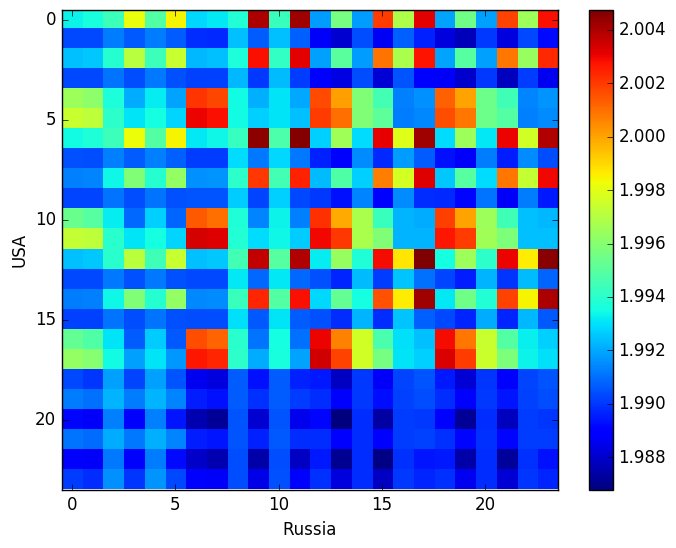

In [109]:
function plot_heatmap(scores_matrix::Array, labelx, labely)
    imshow(scores_matrix, cmap="jet", aspect="auto", interpolation="nearest")
    colorbar()
    plt[:ylabel](labely)
    plt[:xlabel](labelx)
end;
plot_heatmap(scores_matrix, "Russia", "USA");

<p style = "text-align: justify"> 
Since the Maximin (USA) and Minimax (Russia) optimal strategies have different optimal values, a pure Nash equilibrium does not exist. This is intuitive since we can't expect there to be one pure strategy in real life since aticking to one strategy would make the team predictable. If a team is predictable in its actions, a comparable opposition can always come up with a strategy to beat it. In order to find a Nash Equilibrium (if one exists), we must now consider mixed strategies.
</p>

## <center>5. Nash Equilibrium Model</center> ##

Having seen that no pure strategy Nash Equilibrium esists for our problem, we must eliminate the restriction to pure strategies. 

### 5.A. Mathematical model ###
<p style = "text-align: justify"> 
Since pure strategy doesn't have Nash equilibrium, in this part, we will solve this problem using mixed strategy and try to model it as a relaxed assignment problem. We start from the formal model of mixed strategy. 
</p>
<p>
<b> Primal: </b></p>
As explained in the previous parts, mixed strategy optimization can be modeled as: 
$$
\begin{aligned}
\underset{p \in \mathbb{R}}{\text{max}}\underset{j \in \{1,..,M\}}{\text{min}} \qquad& g_j = \sum_{i=1}^M p_i * match\_score(h_i, v_j)\\
\text{subject to:} 
\qquad& 0 \leq p_i \leq 1 && i=1,\dots,N\\
\qquad& \sum_{i=1}^{N} p_i = 1  
\end{aligned}
$$
With: 
- $p_i$ is the probability of strategy i of home team
- $match_score(h_i, v_j)$ is the expected match score when home team uses strategy $h_i$ and visitor uses strategy $v_j$ 

(1) Now, suppose $x_{ik}$ is probability of player i of home team playing at table k, we have:   
- $x_{ik}$ is independent with all strategies of visitor
- $\sum_{i=1}^{N}x_{i,k} = 1$ 
- $\sum_{k=1}^{N}x_{i,k} = 1$ 

(2) Consider a strategy of visitor: $v_j = [v_{j1}, v_{j2}, ..., v_{jM}]$, then total score in $g_j$ to which $v_{jk}$ contributes is:  $\sum_{i=1}^N score(i, j, k) * x_{ik}$       

From (1) & (2), we see that mixed strategy can be modeled as a relaxed assignment problem.

Using the similar approch for pure strategy, we can model this as:    
$$
\begin{aligned}
\underset{p,q,r,x \in \mathbb{R}}{\text{maximize}} \qquad& \sum_{j=1}^{N}{p_j} + \sum_{k=1}^{N}{q_k} 
+ \sum_{j=1}^{N}\sum_{k=1}^{N}r_{jk}\\
\text{subject to:} 
\qquad& 0 \leq x_{i,k} \leq 1 && i=1,\dots,N  (constraint 0) \\
\qquad& p_j, q_k: free && j,k=1,\dots,N \\
\qquad& r_{jk} \leq 0 && j,k=1,\dots,N \\
\qquad& \sum_{i=1}^{N}x_{i,k} = 1 && k=1,\dots,N (constraint 1)\\
\qquad& \sum_{k=1}^{N}x_{i,k} = 1 && i=1,\dots,N (constraint 2)\\
\qquad& p_j + q_k + r_{jk} \leq \sum_{i=1}^N score(i, j, k) * x_{i,k} && i,i,k=1,\dots,N (constraint 3)\\
\end{aligned}
$$
<p>
<b> Dual: </b>
</p>
<p>
To prove that Nash equilibrium is obtained, we find the dual form of the model above:</p>   
$$
\begin{aligned}
\underset{b,c,e,a \in \mathbb{R}}{\text{minimize}} \qquad& \sum_{i=1}^{N}{b_i} + \sum_{k=1}^{N}{c_k} 
+ \sum_{i=1}^{N}\sum_{k=1}^{N}e_{ik}\\
\text{subject to:} 
\qquad& 0 \leq a_{j,k} \leq 1 && j=1,\dots,N (~ constraint 3)\\
\qquad& b_j, c_k: free && i,k=1,\dots,N (~ constraint 1, 2)\\
\qquad& e_{ik} \geq 0 && i,k=1,\dots,N (~ constraint 0)\\
\qquad& \sum_{j=1}^{N}a_{j,k} = 1 && k=1,\dots,N\\
\qquad& \sum_{k=1}^{N}a_{j,k} = 1 && j=1,\dots,N\\
\qquad& b_i + c_k + e_{ik} \geq \sum_{j=1}^N score(i, j, k) * a_{j,k} && i,j,k=1,\dots,N\\
\end{aligned}
$$

We now formulate the primal form of the visitor team.  

<p>
<b> Primal form of visitor team (Minimax): </b>  
</p>

$$
\begin{aligned}
\underset{p,q,r,y \in \mathbb{R}}{\text{minimize}}\qquad& \sum_{i=1}^{N}{p_i} + \sum_{k=1}^{N}{q_k} 
+ \sum_{i=1}^{N}\sum_{k=1}^{N}r_{ik}\\
\text{subject to:} 
\qquad& 0 \leq y_{j,k} \leq 1 && j=1,\dots,N \\
\qquad& p_j, q_k: free && i,k=1,\dots,N \\
\qquad& r_{ik} \geq 0 && i,k=1,\dots,N \\
\qquad& \sum_{j=1}^{N}y_{j,k} = 1 && k=1,\dots,N\\
\qquad& \sum_{k=1}^{N}y_{j,k} = 1 && j=1,\dots,N\\
\qquad& p_i + q_k + r_{ik} \geq \sum_{j=1}^N score(i, j, k) * y_{j,k} && i,j,k=1,\dots,N\\
\end{aligned}
$$
<p style = "text-align: justify"> 
On inspection, we notice that the above formulations of the dual form of home team and primal form of visitor team are actually identical ! This is a non-trivial observation, one that we utilize in the results section.
</p>

### 5.B. Solution ###

In [13]:
function get_MSNE(N_PLAYERS, team_home, team_visitor, get_score, elo)
    nashModel = Model(solver=ClpSolver())

    @variable(nashModel, 1 >= x[1:N_PLAYERS, 1:N_PLAYERS] >= 0)# matrix of main assignment variables
    @variable(nashModel, p[1:N_PLAYERS])                       # vector of inner model dual variables 
    @variable(nashModel, q[1:N_PLAYERS])                       # vector of inner model dual variables
    @variable(nashModel, r[1:N_PLAYERS, 1:N_PLAYERS] <= 0)     # vector of inner model dual variables

    @constraint(nashModel, supply[k in 1:N_PLAYERS], 
                    sum(x[k, j] for j=1:N_PLAYERS) == 1)       # supply constraint
    @constraint(nashModel, demand[k in 1:N_PLAYERS], 
                    sum(x[i, k] for i=1:N_PLAYERS) == 1)       # supply constraint 

    @constraint(nashModel, mincons[j in 1:N_PLAYERS, k in 1:N_PLAYERS], 
                p[j] + q[k] + r[j, k] <= 
                sum(get_score(team_home[i], team_visitor[j], k, k, elo) 
                    * x[i, k] for i=1:N_PLAYERS))              # inner model dual constraint

    @objective(nashModel, Max, sum(p) + sum(q) + sum(r))       # maximization objective function     

    solve(nashModel)

    println("Optimal Score: ", getobjectivevalue(nashModel))
                                        
    return getvalue(x)
end;

In [14]:
function get_MSNE_opponent(N_PLAYERS, team_home, team_visitor, get_score, elo)
    nashModel = Model(solver=ClpSolver())

    @variable(nashModel, 0 <= y[1:N_PLAYERS, 1:N_PLAYERS] <= 1)# matrix of main assignment variables
    @variable(nashModel, p[1:N_PLAYERS])                       # vector of inner model dual variables
    @variable(nashModel, q[1:N_PLAYERS])                       # vector of inner model dual variables
    @variable(nashModel, r[1:N_PLAYERS, 1:N_PLAYERS] >= 0)     # vector of inner model dual variables

    @constraint(nashModel, supply[k in 1:N_PLAYERS], 
                    sum(y[k, j] for j=1:N_PLAYERS) == 1)       # supply constraint
    @constraint(nashModel, demand[k in 1:N_PLAYERS], 
                    sum(y[i, k] for i=1:N_PLAYERS) == 1)       # demand constraint

    @constraint(nashModel, maxcons[i in 1:N_PLAYERS, k in 1:N_PLAYERS],
                p[i] + q[k] + r[i, k] >= 
                sum(get_score(team_home[i], team_visitor[j], k%2, k, elo) 
                    * y[j, k] for j=1:N_PLAYERS))              # inner model dual constraint

    @objective(nashModel, Min, sum(p) + sum(q) + sum(r))       # minimization objective function      

    solve(nashModel)

    println("Optimal Score: ", getobjectivevalue(nashModel))
                                        
    return getvalue(y)
end;

### 5.C. Results and Discussion ###

<b>Primal:</b>
<p style = "text-align: justify">
We solve the primal version of the problem which is essentially like determining the optimum strategy from the home team's perspective (USA).
</p>

In [15]:
xopt = get_MSNE(N_PLAYERS, 
    team_USA, team_Russia, get_chess_score2, player_elo);
println("Home Mixed Strategy")
print_match(xopt, "USA", team_USA, false)

Optimal Score: 1.994211025995414
Home Mixed Strategy
4×4 Named Array{Float64,2}
         USA ╲ Table │        1         2         3         4
─────────────────────┼───────────────────────────────────────
"Wesley So"          │      0.0  0.714061       0.0  0.285939
"Fabiano Caruana"    │ 0.794595       0.0  0.205405       0.0
"Hikaru Nakamura"    │ 0.205405       0.0  0.794595       0.0
"Alexander Onischuk" │      0.0  0.285939       0.0  0.714061



The result can be interpreted as follows:
<ul style = "text-align: justify">
<li>Player 1 of USA should play on table 2 in 71.4% of the matches and on table 4 for the remaining 28.6% of matches. Similarly, player 2 should play on table 1 an average of 79.5% of the time and on table 3 for 20.5% of the time on average; and so on, for the other players.
<li>This probability distribution is the optimal mixed strategy for the primal formulation (Team USA).
<li>To confirm the accuracy of our model, we also find the expected score of the optimal mixed strategy for the primal formulation using enumeration of strategies. This can be found in the [Appendix](#Nash-Equilibrium-by-enumeration-of-strategy-set)
</ul>

<b>Dual:</b>
<p style = "text-align: justify">
Solving the dual version of the problem is akin to solving the problem from the visitor team's perspective (Russia) due to the equivalence of home team dual program and visitor team primal program as illustrated in the mathematical model. 
</p>

In [16]:
yopt = get_MSNE_opponent(N_PLAYERS, 
    team_USA, team_Russia, get_chess_score2, player_elo);
println("Visitor Mixed Strategy")
print_match(yopt, "Russia", team_Russia, false)

Optimal Score: 1.9942110259954142
Visitor Mixed Strategy
4×4 Named Array{Float64,2}
      Russia ╲ Table │        1         2         3         4
─────────────────────┼───────────────────────────────────────
"Vladimir Kramnik"   │ 0.430404       0.0  0.569596       0.0
"Sergey Karjakin"    │ 0.461659  0.107937  0.430404       0.0
"Peter Svidler"      │ 0.107937  0.892063       0.0       0.0
"Ian Nepomniachtchi" │      0.0       0.0       0.0       1.0



The result can be interpreted as follows:
<ul style = "text-align: justify">
<li> Player 1 of Russia should play on table 1 in 43% of the matches and on table 4 in 57% of matches on average. Similarly, player 2 should, on an average, play on table 1 for 79.5% of the time and on table 3 for 20.5% of the time; and so on, for the other players.
<li> This probability distribution is the optimal mixed strategy for the dual formulation (Team Russia).
<li> To confirm the accuracy of our model, we also find the expected score of the optimal mixed strategy for the dual formulation using enumeration of strategies. This can be found in the [Appendix](#Nash-Equilibrium-by-enumeration-of-strategy-set)
</ul>

<p style = "text-align: justify">
The optimum score obtained by solving the primal and dual formulations of the strategy determining problem is identical ! This implies that we have successfully found the mixed strategy Nash Equilibrium for this problem. 
</p>
<p style = "text-align: justify">
We now add the additional complexity of building a chess squad while maximizing the nash optimal expected score. To make things more realistic, we add a requirement to minimize budget of the squad. The next section models this trade-off squad-building problem.

## <center>6. Budget Trade-off Model</center> ##

<p style = "text-align: justify">
We now concentrate on determining team composition in addition to the optimal strategy. The problem of buying a good team while not using too much money is a universal one in sports like soccer and basketball.
We consider a scenario where all chess players of the world are available to play in a Chess League (akin to the [Indian Premier League](https://en.wikipedia.org/wiki/Indian_Premier_League#Tournament_format) in cricket). 
We maintain a pool of players (N_POOL is the number of players in the pool) that are available for playing.
We model the problem to form the best team from the available pool of players. What makes the task particularly interesting  is that other players whom we don't buy could become our opponents. 
This becomes a trade-off problem between increasing expected match score and decreasing the amount of money.  
</p>

We steadily solve this problem by solving 2 sub problems:  
- Selecting a team composition from a pool to maximize expected score.  
- Selecting a team composition from a pool to maximize expected score with a budget trade-off.

### 6.A. Mathematical model ###

<b>(1) Selecting a team composition of N players from a pool of M players</b>

<p>
![tradeoff][pool]
</p>

We can think this problem based from the perspective of a 2-team game. Home team selects nChosen players from the pool to maximize its expected score while the visitor team selects a team from the rest players to minimize the score. We modify the Nash equilibrium model above to solve this.

A remarkably different point from Nash equilibrium model is that if a player is selected from home team, he cannot play for the visitor team. To represent this "if-then" relationship, we introduce a binary variable z: $z_i = 1 \equiv$ player i is selected for home team: 
- $z_i = 0 \implies x_i = 0: \sum_{k=1}^{N}y_{i,k} \leq 1 - \sum_{k=1}^{N}z_{i,k}$    
- $z_i = 1 \implies y_i = 0: \sum_{k=1}^{N}x_{i,k} \leq \sum_{k=1}^{N}z_{i,k}$   

Using the similar approach to convert the inside model into its dual form, our model now becomes:   
$$
\begin{aligned}
\underset{p,q,r,x,z \in \mathbb{R}}{\text{maximize}}\qquad& \sum_{j=1}^{M} p_j (1-\sum_{k=1}^N z_{j,k})+\sum_{k=1}^N q_k +\sum_{j=1}^M\sum_{k=1}^N r_{jk}\\
\text{subject to:} 
\qquad& 0 \leq x_{i,k} \leq 1 \qquad& i=1,\dots,M \qquad k=1,\dots,N  \\
\qquad& z_i: binary \qquad& i=1,\dots,M \\
\qquad& p_j \leq 0 \qquad& j=1,\dots,M \\
\qquad& q_k: free \qquad& k=1,\dots,N \\
\qquad& r_{jk} \leq 0 \qquad& j=1,\dots,M \qquad k=1,\dots,N  \\
\qquad& \sum_{i=1}^{M}x_{i,k} = 1 \qquad k=1,\dots,M \qquad& \sum_{k=1}^{N}x_{i,k} \leq 1 \qquad i=1,\dots,N\\
\qquad& \sum_{i=1}^{M}z_{i,k} = 1 \qquad k=1,\dots,M \qquad& \sum_{k=1}^{N}z_{i,k} \leq 1 \qquad i=1,\dots,N\\ 
\qquad& \sum_{k=1}^{N}x_{i,k} \leq \sum_{k=1}^{N}z_{i,k} \qquad& i=1,\dots,N\\
\qquad& p_j + q_k + r_{jk} \leq \sum_{i=1}^M score(i, j, k) * x_{i,k} \qquad& i,j=1,\dots,M \qquad k=1,\dots,N\\
\end{aligned}
$$

Using epigraph, we can convert quadratic term in the objective into a linear function:   
$$
\begin{aligned}
\underset{p,z \in \mathbb{R}}{\text{maximize}}\sum_{j=1}^{M} p_j (1-\sum_{k=1}^N z_{j,k}) = 
\underset{t \in \mathbb{R}}{\text{maximize}}\sum_{j=1}^{M} t_j \\
\text{subject to:} 
\qquad& t_j \leq 0 && j=1,\dots,M \\
\qquad& t_j \geq -\infty * (1 - \sum_{k=1}^{N}z_{j,k}) && j=1,\dots,M \\
\qquad& t_j \leq p_j + \infty * \sum_{k=1}^{N}z_{j,k} && j=1,\dots,M
\end{aligned}
$$

Then, combine this transformation into the previous model, we have the final solution. 

<b>(2) Selecting with a budget trade-off </b>

To solve this trade off, we only need to introduce a new value representing the cost of selected players for home team. With $price(i)$ being the price of player $i^{th}$ in the pool and $z_0$ being a selection, we have:   
$$
\begin{aligned}
cost(z_0) = \sum_{i=1}^M (\sum_{k=1}^{N}z_{i,k}) * price(i)
\end{aligned}
$$

Then, our objective function becomes: 
$$
\begin{aligned}
\underset{p,q,r,x,z \in \mathbb{R}}{\text{maximize}}\sum_{j=1}^{M} p_j (1-\sum_{k=1}^N z_{j,k})+\sum_{k=1}^N q_k +\sum_{j=1}^M\sum_{k=1}^N r_{jk} - \lambda *cost(z)\\
\end{aligned}
$$

[pool]: ./images/pool.jpg

### 6.B. Solution ###

In [17]:
### Select a team compsition from a pool
function select_from_pool_mixed(N_POOL, N_CHOSEN, get_score, elo)
    inf = -1000
    sup = 1000 #

    xm = Model(solver=CbcSolver())

    # matrix of main probabilistic assignment variables
    @variable(xm, 0 <= x[1:N_POOL, 1:N_CHOSEN] <= 1)
    # matrix of main assignment variables
    @variable(xm, z[1:N_POOL, 1:N_CHOSEN], Bin)
    # vector of inner model dual variables
    @variable(xm, p[1:N_POOL] <= 0) 
    # vector of inner model dual variables
    @variable(xm, q[1:N_CHOSEN])
    # matrix of inner model dual variables
    @variable(xm, r[1:N_POOL, 1:N_CHOSEN] <= 0)
    # vector of epigraph variables
    @variable(xm, t[1:N_POOL] <= 0)

    # supply constraint of z
    @constraint(xm, supply[i in 1:N_POOL], 
                    sum(z[i, k] for k=1:N_CHOSEN) <= 1)
    # demand constraint of z
    @constraint(xm, demand[k in 1:N_CHOSEN], 
                    sum(z[i, k] for i=1:N_POOL) == 1)
    # supply constraint of x                   
    @constraint(xm, supplyProb[i in 1:N_POOL], 
                                sum(x[i, k] for k=1:N_CHOSEN) <= 1)
    # demand constraint of x
    @constraint(xm, demandProb[k in 1:N_CHOSEN], 
                                sum(x[i, k] for i=1:N_POOL) == 1)


    # z = 0 => x = 0
    @constraint(xm, node[i in 1:N_POOL], 
            sum(x[i, k] for k=1:N_CHOSEN) <= sum(z[i, k] for k=1:N_CHOSEN))
    # epigraph constraint 1                                                               
    @constraint(xm, icons[j in 1:N_POOL], t[j] >= 
                                (1 - sum(z[j, k] for k=1:N_CHOSEN))*inf)
    # epigraph constraint 2   
    @constraint(xm, ucons[j in 1:N_POOL], t[j] <= 
                                p[j] + sup*sum(z[j, k] for k=1:N_CHOSEN))
    # dual constraint
    @constraint(xm, mincons[j in 1:N_POOL, k in 1:N_CHOSEN], 
        p[j] + q[k] + r[j, k]  <= sum(get_score(i, j, k, k, elo) 
                                                    * x[i, k] for i=1:N_POOL))
    # objective
    @objective(xm, Max, sum(t) + sum(q) + sum(r))        

    solve(xm)
    println("Optimal Score: ", getobjectivevalue(xm))
    return getvalue(x)
end;

In [84]:
### Select a team compsition from a pool with a budget trade-off
function select_with_budget_mixed(lambda, N_POOL, N_CHOSEN, 
        get_score, elo, worth)
    inf = -1000
    sup = 1000 

    xm = Model(solver=CbcSolver())

    # matrix of main probabilistic assignment variables
    @variable(xm, 0 <= x[1:N_POOL, 1:N_CHOSEN] <= 1)
    # matrix of main assignment variables
    @variable(xm, z[1:N_POOL, 1:N_CHOSEN], Bin)
    # vector of inner model dual variables
    @variable(xm, p[1:N_POOL] <= 0) 
    # vector of inner model dual variables
    @variable(xm, q[1:N_CHOSEN])
    # matrix of inner model dual variables
    @variable(xm, r[1:N_POOL, 1:N_CHOSEN] <= 0)
    # vector of epigraph variables
    @variable(xm, t[1:N_POOL] <= 0)

    # supply constraint of z
    @constraint(xm, supply[i in 1:N_POOL], 
                    sum(z[i, k] for k=1:N_CHOSEN) <= 1)
    # demand constraint of z
    @constraint(xm, demand[k in 1:N_CHOSEN], 
                    sum(z[i, k] for i=1:N_POOL) == 1)
    # supply constraint of x                   
    @constraint(xm, supplyProb[i in 1:N_POOL], 
                                sum(x[i, k] for k=1:N_CHOSEN) <= 1)
    # demand constraint of x
    @constraint(xm, demandProb[k in 1:N_CHOSEN], 
                                sum(x[i, k] for i=1:N_POOL) == 1)

    # z = 0 => x = 0
    @constraint(xm, node[i in 1:N_POOL], 
            sum(x[i, k] for k=1:N_CHOSEN) <= sum(z[i, k] for k=1:N_CHOSEN))
                                                                    
    # epigraph constraint 1                                                               
    @constraint(xm, icons[j in 1:N_POOL], t[j] >= 
                                (1 - sum(z[j, k] for k=1:N_CHOSEN))*inf)
    # epigraph constraint 2   
    @constraint(xm, ucons[j in 1:N_POOL], t[j] <= 
                                p[j] + sup*sum(z[j, k] for k=1:N_CHOSEN))
    # dual constraint
    @constraint(xm, mincons[j in 1:N_POOL, k in 1:N_CHOSEN], 
        p[j] + q[k] + r[j, k]  <= sum(get_score(i, j, k, k, elo) 
                                                    * x[i, k] for i=1:N_POOL))
    # Player cost expression
    @expression(xm, playercost,  lambda * 
                sum(sum(z[i, k] for k=1:N_CHOSEN) 
                        * worth[i] for i=1:N_POOL))
    # Objective function
    @objective(xm, Max, sum(t) + sum(q) + sum(r) - playercost)        

    solve(xm)

    println("Optimal Score: ", getobjectivevalue(xm))
    return [getvalue(x), getobjectivevalue(xm), getvalue(playercost)] 
end;

### 6.C. Results and Discussion ###

We solve the model for estimating team composition (team of 4) from a pool of 10 players. The goal is to maximize expected score in any match played against any of the remaining players in the pool. 

In [19]:
xopt = select_from_pool_mixed(N_POOL, N_CHOSEN, get_chess_score3, elos);
print_match(xopt, "Name", players[1:N_POOL], false)

Optimal Score: 2.1645249093433114
10×4 Named Array{Float64,2}
            Name ╲ Table │   1    2    3    4
─────────────────────────┼───────────────────
"Magnus Carlsen"         │ 0.0  1.0  0.0  0.0
"Wesley So"              │ 0.0  0.0  0.0  1.0
"Vladimir Kramnik"       │ 1.0  0.0  0.0  0.0
"Fabiano Caruana"        │ 0.0  0.0  1.0  0.0
"Maxime Vachier Lagrave" │ 0.0  0.0  0.0  0.0
"Levon Aronian"          │ 0.0  0.0  0.0  0.0
"Viswanathan Anand"      │ 0.0  0.0  0.0  0.0
"Hikaru Nakamura"        │ 0.0  0.0  0.0  0.0
"Anish Giri"             │ 0.0  0.0  0.0  0.0
"Sergey Karjakin"        │ 0.0  0.0  0.0  0.0



<p style = "text-align: justify">As expected, the model simply chooses the best 4 players for the team in the absence of any budget constraints. What's interesting, though is that the model predicts a pure strategy in this case. This is not really surprising because no matter what the opposition's strategy is, if the best 4 players belong to our team, the expected score will always be in the favor of our team.</p>

<p style = "text-align: justify"> The above result illustrates why we need to include a budget minimization object in the model. We study the impact of monetary contraints by checking the optimal score expected score values as well as the players chosen for different values of $\lambda$.

In [85]:
function explore_tradeoff(lambda)   
    result = select_with_budget_mixed(lambda, N_POOL, N_CHOSEN, 
        get_chess_score3, elos, worth * 0.001)
    xopt = result[1]
    cost = result[3]
    score = result[2] + cost
    println("Expected score: ", score)
    println("Cost: ", cost)
    print_match(xopt, "Name", players[1:N_POOL], false)
end;

explore_tradeoff(0.1) 

1.7690212512233106
Expected score: 2.1645249093433105
Cost: 0.39550365812
10×4 Named Array{Float64,2}
            Name ╲ Table │   1    2    3    4
─────────────────────────┼───────────────────
"Magnus Carlsen"         │ 0.0  1.0  0.0  0.0
"Wesley So"              │ 0.0  0.0  0.0  1.0
"Vladimir Kramnik"       │ 1.0  0.0  0.0  0.0
"Fabiano Caruana"        │ 0.0  0.0  1.0  0.0
"Maxime Vachier Lagrave" │ 0.0  0.0  0.0  0.0
"Levon Aronian"          │ 0.0  0.0  0.0  0.0
"Viswanathan Anand"      │ 0.0  0.0  0.0  0.0
"Hikaru Nakamura"        │ 0.0  0.0  0.0  0.0
"Anish Giri"             │ 0.0  0.0  0.0  0.0
"Sergey Karjakin"        │ 0.0  0.0  0.0  0.0



In [86]:
explore_tradeoff(0.2) 

1.374091930733549
Expected score: 2.091367830713549
Cost: 0.71727589998
10×4 Named Array{Float64,2}
            Name ╲ Table │        1         2         3         4
─────────────────────────┼───────────────────────────────────────
"Magnus Carlsen"         │      0.0  0.256532       0.0  0.743468
"Wesley So"              │      0.0  0.743468       0.0  0.256532
"Vladimir Kramnik"       │      0.0       0.0       0.0       0.0
"Fabiano Caruana"        │ 0.586324       0.0  0.413676       0.0
"Maxime Vachier Lagrave" │      0.0       0.0       0.0       0.0
"Levon Aronian"          │      0.0       0.0       0.0       0.0
"Viswanathan Anand"      │      0.0       0.0       0.0       0.0
"Hikaru Nakamura"        │      0.0       0.0       0.0       0.0
"Anish Giri"             │ 0.413676       0.0  0.586324       0.0
"Sergey Karjakin"        │      0.0       0.0       0.0       0.0



In [100]:
explore_tradeoff(0.72) 

-0.4898031134582407
Expected score: 1.9847704740297591
Cost: 2.474573587488
10×4 Named Array{Float64,2}
            Name ╲ Table │        1         2         3         4
─────────────────────────┼───────────────────────────────────────
"Magnus Carlsen"         │      0.0       0.0       0.0       0.0
"Wesley So"              │ 0.177799  0.391632       0.0  0.430569
"Vladimir Kramnik"       │      0.0       0.0       0.0       0.0
"Fabiano Caruana"        │ 0.822201       0.0  0.177799       0.0
"Maxime Vachier Lagrave" │      0.0       0.0  0.822201  0.177799
"Levon Aronian"          │      0.0       0.0       0.0       0.0
"Viswanathan Anand"      │      0.0       0.0       0.0       0.0
"Hikaru Nakamura"        │      0.0       0.0       0.0       0.0
"Anish Giri"             │      0.0  0.608368       0.0  0.391632
"Sergey Karjakin"        │      0.0       0.0       0.0       0.0



In [83]:
explore_tradeoff(1)

-1.4521372863702413
10×4 Named Array{Float64,2}
A ╲ B │        1         2         3         4
──────┼───────────────────────────────────────
1     │      0.0       0.0       0.0       0.0
2     │ 0.177799  0.391632       0.0  0.430569
3     │      0.0       0.0       0.0       0.0
4     │ 0.822201       0.0  0.177799       0.0
5     │      0.0       0.0  0.822201  0.177799
6     │      0.0       0.0       0.0       0.0
7     │      0.0       0.0       0.0       0.0
8     │      0.0       0.0       0.0       0.0
9     │      0.0  0.608368       0.0  0.391632
10    │      0.0       0.0       0.0       0.0
Expected score: 1.9847704740297587
Cost: 3.4369077604
10×4 Named Array{Float64,2}
            Name ╲ Table │        1         2         3         4
─────────────────────────┼───────────────────────────────────────
"Magnus Carlsen"         │      0.0       0.0       0.0       0.0
"Wesley So"              │ 0.177799  0.391632       0.0  0.430569
"Vladimir Kramnik"       │      0.0       

In [101]:
# compute optimal tradeoff curve (this may take a few seconds
N = 30
lambda_values = linspace(0.1,1,N)
# lambda_values = [0.001, 0.05, 0.01, 0.1, 1, 10]
N = length(lambda_values)
cost = zeros(N)
score = zeros(N)
opt = zeros(N)
for (i, lambda) in enumerate(lambda_values)
   result = select_with_budget_mixed(lambda, N_POOL, N_CHOSEN, 
        get_chess_score3, elos, worth * 0.001)
    cost[i] = result[3]
    score[i] = result[2] + result[3]
    opt[i] = result[2]
end

1.7690212512233106
1.6462787366343452
1.5235362220453796
1.400793707456414
1.28752414970148
1.176222282686687
1.0649208499311695
0.9536198514349284
0.8423184186794116
0.7310165516646182
0.6197151189091009
0.5084141204128595
0.3971126876573422
0.2858112549018249
0.17450982214630806
0.06320838939079033
-0.048093043364726626
-0.15939447612024393
-0.2706959088757612
-0.38199734163127896
-0.4921733946723096
-0.5988360493054129
-0.7054987039385167
-0.81216135857162
-0.9188240132047237
-1.0254866678378272
-1.13214932247093
-1.2388119771040333
-1.3454746317371384
-1.4521372863702413


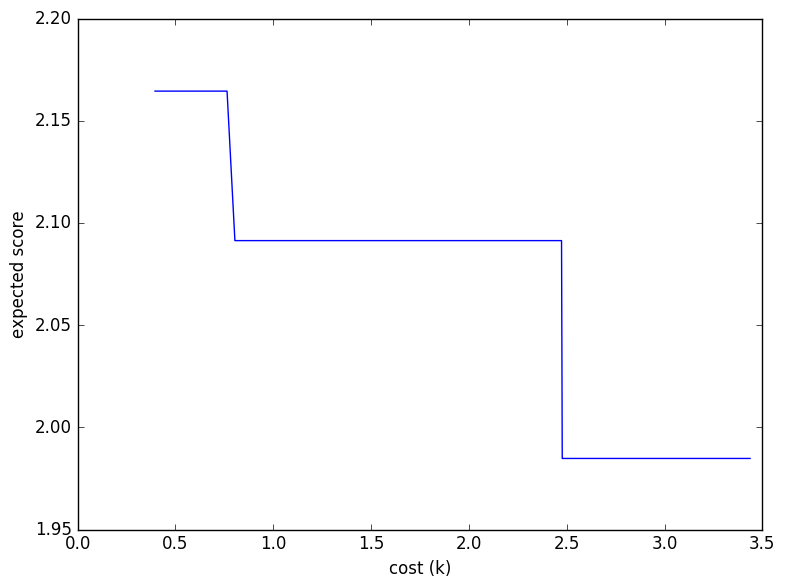

In [102]:
using PyPlot
plot(cost, score,"b-")
xlabel("cost (k)")
ylabel("expected score")
# axis([0,0.04,1.5, 2.2]);
tight_layout()

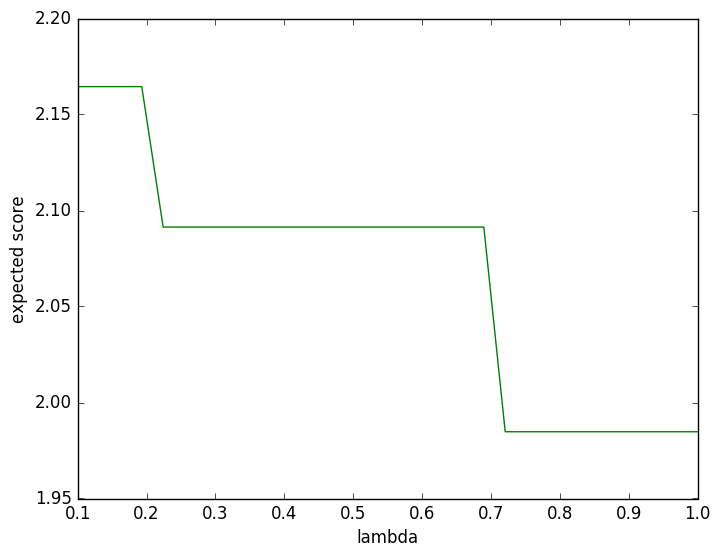

PyObject <matplotlib.text.Text object at 0x000000002F17B588>

In [104]:
plot(lambda_values, score,"g-")
xlabel("lambda")
ylabel("expected score");

## <center>7. Results Summary and Discussion </center> ##
<p style = "text-align: justify">
We have solved the most generalized form of the team strategy problem. We started with the most naive and restricted model of determining a team strategy given the team composition as well as the opposition's pure strategy. Second, we eliminated the assumption of knowledge of opposition's strategy to find a team's optimal pure strategy in the Maximin model given its composition. The third model no longer restricted itself to just pure strategies. It found an optimal mixed strategy for a particular team composition and also introduced the concept of Nash Equilibrium in the strategy determination problem. Finally, the last model considered variable team compositions to find the optimal mixed strategy with and without budget constraints.
</p>
What follows is a summary of the results from each of the models and a discussion of some of the interesting aspects that were observed: 


<ul style = "text-align: justify">
<li> The Naive model found the optimal strategy under the assumption that the opposition's strategy was fixed and known to the team a priori. An interesting result was the identification of the fact that the head-to-head score estimation plays a vital role in determining the optimal strategy and an unrealistic score function can lead to an overly-optimistic estimate of expected score as seen in the first variation of the [Naive model's results](#3.C.-Results-and-Discussion). The assumption of knowledge of opponent's strategy was then relaxed in the Maximin model.
<li> The [Maximin model's results](#4.C.-Results-and-Discussion) illustrated that no pure nash equilibrium exists for determining optimal team strategy. This is in agreement with our intuition that sticking to a particular pure strategy in repeated instances would make the team predictable; something which the opposition can take advantage of. We can therefore conclude that, such a format of gameplay should not typically have a pure Nash Equilibrium. Hence, the results of the Maximin model serve to confirm this logical intuition.
<li> Another interesting observation from the Maximin-Minimax formulation was that the Maximin optimal value (1.984448793236806) was lesser than the Minimax optimal value (1.9844607584620062). The fact that Maximin and Minimax values can be equal at Nash equilibrium leads us to wonder if, in general 2 player games, the Maximin optimal $\leq$ Minimax optimal. As it turns out, this result is in consonance with the lemma that  
$$\begin{aligned}
\underset{x \in \mathbb{(0, 1)}}{\text{max}}\underset{y \in \mathbb{(0, 1)}}{\text{min}} P_{xy} 
\leq 
\underset{y \in \mathbb{(0, 1)}}{\text{min}}\underset{x \in \mathbb{(0, 1)}}{\text{max}} P_{xy}
\end{aligned}
$$
A quick proof of the lemma can be formulated as follows:
For a particular row $x_0$, we know the following inequality holds: 
$$ \begin{aligned}
g(x_0) = 
\underset{y'}{\text{min }} P(x_0, y') \leq P(x_0, y) \leq 
\underset{x'}{\text{max }} P(x', y) && \forall x, y
\end{aligned}
$$
In other words,, 
$$ \begin{aligned}
g(x) = \underset{y'}{\text{min}} P(x, y') \leq \underset{x'}{\text{max}} P(x', y) = h(y) \forall x,y
g(x) \leq h(y) \forall x,y
\end{aligned}
$$ 
Therefore, 
$$ \begin{aligned}
\underset{x}{\text{max}} g(x) \leq \underset{y}{\text{min}} h(y) \forall x,y
\end{aligned}
$$
Hence, we have:  
$$\begin{aligned}
\underset{x}{\text{max}}\underset{y}{\text{min}} P_{xy} 
\leq 
\underset{y}{\text{min}}\underset{x}{\text{max}} P_{xy}
\end{aligned}
$$

<li> The [Nash model results](#5.C.-Results-and-Discussion) were arguably the most significant in terms of confirming theoretical concepts. We confirmed the existence of a mixed strategy Nash Equilibrium and found the optimal expected score. We also found the corresponding Nash Equilibrium strategies for both the home and opposition teams.
<li> In the [Budget-tradeoff results](#6.C.-Results-and-Discussion), we explored the impact that monetary restrictions can have in the process of decision making while building a team. As anticipated, the expected score consistently decreased as more emphasis (higher \lambda) was laid on the budget minimization objective.  
</ul>

## <center>8. Conclusion</center> ##

<p style = "text-align: justify"> In this project, we have illustrated how optimization techniques can be leveraged to determine the best strategy for a team in order to maximize winning chances based on game theoretic concepts. We also illustrated how to determine the best chess team composition and strategy to maximize probability of winning under budget constraints.
</p>
<p style = "text-align: justify">Through the course of the project, we used practical results of optimization models to introduce and exemplify theoretical game theory concepts. Specifically, we applied optimization concepts seen in class such as primal modeling, dual transformation, trade-off and strong duality to illustrate game theoretic concepts like Nash Equilibrium as well as Maximin and Minimax strategies.</p>
<p style = "text-align: justify"> We provided both empirical and theoretical evidence that, in general, the Maximin optimal $\leq$ Minimax optimal. A pure strategy Nash equilibrium would exist when the equality holds (Maximin = Minimax). We also illustrated, both mathematically as well as in practice, how the dual form of one team's mixed strategy model is the primal form of the other team's mixed strategy model. We used this to show that a  mixed strategy Nash Equilibrium (if one exists) can be found by solving the primal and dual forms of a game and comparing . If the optimal values of primal and dual forms are equal to each other (strong duality holds) then that is a Nash Equilibrium of the game.</p> 
<p style = "text-align: justify"> The optimization models built as part of this project project can be applied, without modification, to determine optimal strategies for any team sports with rubbers that are non-cooperative in nature.
The techniques described in this project are applicable, without any modification, to other team sports such as tennis, wrestling and boxing, that involve a series of one-on-one games to determine the victorious team.  The [Davis Cup](https://en.wikipedia.org/wiki/Davis_Cup) and the [Fed Cup](https://en.wikipedia.org/wiki/Fed_Cup) are examples of tournaments in the realm of tennis where these models can potentially prove to be extremely effective for maximizing winning probabilities. 
The models presented can also be modified slightly to develop strategies for online battle strategy games like Age of Empires and Clash of Clans as well as for determining squad composition and battle order in card and video games like Pokemon. 
</p>
<p style = "text-align: justify">
The models built in this project, however, are not trivially extendable to all team sports. Since they do not account for the element of cooperation between team members, they would require major modification in order to determine strategies for team sports like soccer and basketball. An interesting direction for further extension of this project would be to extend the idea to include cooperative team sports as well. This would require us to possess a mathematical model that accurately takes into account each team member's contribution to the strength of other tem members' strength while estimating relative probability of winning against an opposition. </p>

## <center>9. Appendix</center> ##

### Game Theory Jargon: Rock-Paper-Scissor ###

<p style = "text-align: justify">
<b>Pure Strategy:</b> A pure strategy is an unconditional, defined choice that a person makes in a situation or game. For example, in the game of Rock-Paper-Scissors,if a player would choose to only play scissors for each and every independent trial, regardless of the other player’s strategy, choosing scissors would be the player’s pure strategy. The set of all options (i.e. rock, paper, and scissors) available in this game is known as the strategy set.
</p>
<p style = "text-align: justify">
<b>Mixed Strategy:</b> A mixed strategy is an assignment of a probability to each pure strategy in the strategy set. Using the example of Rock-Paper-Scissors, if a person’s probability of employing each pure strategy is equal, then the probability distribution of the strategy set would be 1/3 for each option, or approximately 33%. In other words, a person using a mixed strategy incorporates more than one pure strategy into a game. This allows for a player to randomly select a pure strategy. Since probabilities are continuous, there are infinitely many mixed strategies available to a player. A mixed strategy can simply be considered as the probability distribution one uses to randomly choose among available actions in order to avoid being predictable.
Of course, one can regard a pure strategy as a degenerate case of a mixed strategy, in which that particular pure strategy is selected with probability 1 and every other strategy with probability 0. If a pure strategy in Rock-Paper-Scissors is to play scissors, thenit can be considered a mixed strategy where probability for choosing scissors equal to 1 and all other options (paper and rock) are chosen with the probability of 0.
</p>
<p style = "text-align: justify">
<b>Nash Equilibrium:</b>
[Nash Equilibrium](http://www.investopedia.com/terms/n/nash-equilibrium.asp#ixzz4gSfkX0Wn) is a pair of strategies in which each player’s strategy is the best response to the other player’s strategy and no player has an incentive to deviate from his chosen strategy after considering an opponent's choice. Overall, in a Nash Equilibrium, an individual can receive no incremental benefit (only stands to lose) from changing actions, assuming other player remains constant in his strategy.
</p>

It is important to note that games can have

- Only one pure Nash Equilibrium 
- Only one mixed Nash Equilibrium and no pure Nash Equilibrium 
- Multiple pure Nash Equilibrium 
- Pure and mixed Nash Equilibrium

<p style = "text-align: justify">
It can be seen that Rock-Paper-Scissors belongs to the second category.The reason why there isn’t a pure Nash Equilibrium is that there is no way a player can hope to win if he makes the same choice 100% of the time. For example, let’s take player 1. If he consistently plays rock, then player 2 will always choose paper. Player 1 will never win. Thus, there is no pure equilibrium – it just doesn’t make sense for one player to ALWAYS pick one choice for the whole game – it’s just too predictable. There is, however, a mixed Nash Equilibrium wherein each player plays each of rock, paper and scissors approximately 33% of the time. Even knowing that player 1 is adopting this mixed strategy of (1/3, 1/3, 1/3) does not give player 2 any reason to change his strategy of (1/3, 1/3, 1/3). If player 1 plays any other strategy, say (1/4, 1/4, 1/2), player 2 can exploit that information and win. Therefore, (1/3, 1/3, 1/3) is the mixed Nash Equilibrium for Rock-Paper-Scissors. 
</p>
<p style = "text-align: justify">

[Back to referring section](#1.B.-Terminology)

### Maximin and Minimax by enumeration of strategy set ###

In [25]:
function get_maximin_pure_by_enumeration(score_matrix::Array, maxPlayer=true)
    n = size(scores_matrix)[1]
    t = zeros(n)
    if maxPlayer             
        for k in 1:n
            t[k] = findmin(score_matrix[k, 1:n])[1]
        end
        return findmax(t)
    else
        for k in 1:n
            t[k] = findmax(score_matrix[1:n, k])[1]
        end
        return findmin(t)
    end
end
;
println("Maximin Score: ",get_maximin_pure_by_enumeration(scores_matrix, true)) # true for primal
println("Minimax Score: ",get_maximin_pure_by_enumeration(scores_matrix, false)) # false for primal

Maximin Score: (1.9927314745883484,7)
Minimax Score: (1.9944383641261816,3)


[Back to referring section](#4.C.-Results-and-Discussion)

### Nash Equilibrium by enumeration of strategy set ###

In [26]:
function get_MSNE_by_enumeration(score_matrix::Array)
    n = size(scores_matrix)[1]
    # for primal - P person
    m = Model(solver=ClpSolver())

    @variable(m, 1>= p[1:n] >=0)
    @variable(m, t)

    @constraint(m, sum(p) == 1)
    @constraint(m, min_const[k in 1:n], 
        sum(p[i] * score_matrix[i, k] for i=1:n) >= t)
    # Max min (g1, g2, ..., gn)
    @objective(m, Max, t)
    solve(m)
                
    popt = getvalue(p)
#     println(popt)
    println(getobjectivevalue(m))
    return popt
end;
function get_MSNE_dual_by_enumeration(score_matrix::Array)
    n = size(scores_matrix)[2]
    # for primal - P person
    m = Model(solver=ClpSolver())

    @variable(m, 1>= q[1:n] >=0)
    @variable(m, t)

    @constraint(m, sum(q) == 1)
    @constraint(m, max_const[k in 1:n], 
        sum(q[i] * score_matrix[k, i] for i=1:n) <= t)
    # Max min (g1, g2, ..., gn)
    @objective(m, Min, t)
    solve(m)
                
    qopt = getvalue(q)
#     println(qopt)
    println(getobjectivevalue(m))
    return qopt
end;  
        
print("Primal optimal score: ") 
popt = get_MSNE_by_enumeration(scores_matrix);
print("Dual optimal score: ") 
popt =get_MSNE_dual_by_enumeration(scores_matrix);;

Primal optimal score: 1.9942110259954138
Dual optimal score: 1

[Back to referring section](#5.C.-Results-and-Discussion)

### Heatmap for strategy set ###

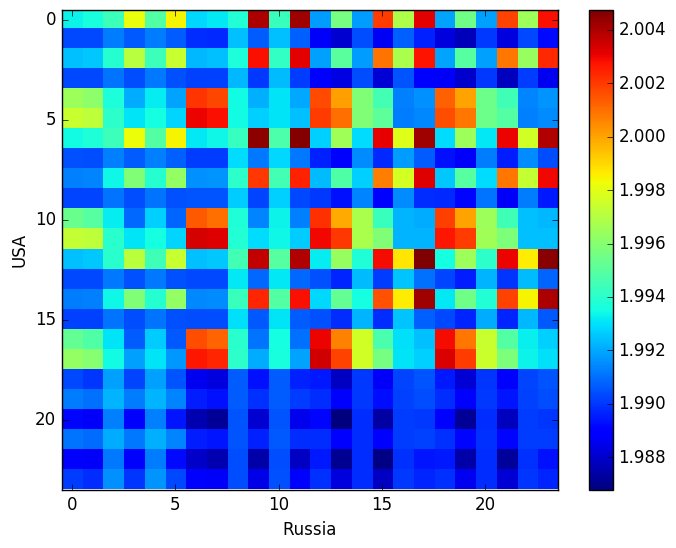